In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pylab as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import time

import sys
datadir = '/Users/joewandy/Dropbox/Meta_clustering/MS2LDA/large_study/Urine_mzXML_large_study/method_1/POS/'
basedir = '/Users/joewandy/git/lda/code/'
sys.path.append(basedir)

from multifile_feature import SparseFeatureExtractor
from lda import VariationalLDA,MultiFileVariationalLDA

In [2]:
def extract_features(input_set, fragment_grouping_tol, loss_grouping_tol, 
                     loss_threshold_min_count, loss_threshold_max_val):
    
    extractor = SparseFeatureExtractor(input_set, fragment_grouping_tol, loss_grouping_tol, 
                                       loss_threshold_min_count, loss_threshold_max_val,
                                       input_type='filename')
    
    # create the grouping for the fragments
    fragment_q = extractor.make_fragment_queue()
    fragment_groups = extractor.group_features(fragment_q, extractor.fragment_grouping_tol)
    
    # create the grouping for the losses
    loss_q = extractor.make_loss_queue()
    loss_groups = extractor.group_features(loss_q, extractor.loss_grouping_tol, 
                                           check_threshold=True)
    
    # populate the counts
    extractor.create_counts(fragment_groups, loss_groups, scaling_factor)
    
    return extractor

In [3]:
scaling_factor=1000             # previously set to 100 in the single file LDA 
fragment_grouping_tol=7        # grouping tolerance in ppm for the fragment
loss_grouping_tol=7            # grouping tolerance in ppm for the neutral loss
loss_threshold_min_count=5     # min. counts of loss values to occur
loss_threshold_max_val=200     # max. loss values

In [4]:
input_set = [
    (datadir + 'Urine_StrokeDrugs_02_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_02_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_03_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_03_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_08_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_08_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_09_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_09_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_17_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_17_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_18_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_18_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_28_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_28_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_32_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_32_T10_POS_ms2.csv'),
]

In [5]:
extractor = extract_features(input_set, fragment_grouping_tol, loss_grouping_tol, 
                            loss_threshold_min_count, loss_threshold_max_val)

Loading /Users/joewandy/Dropbox/Meta_clustering/MS2LDA/large_study/Urine_mzXML_large_study/method_1/POS/Urine_StrokeDrugs_02_T10_POS_ms1.csv
Loading /Users/joewandy/Dropbox/Meta_clustering/MS2LDA/large_study/Urine_mzXML_large_study/method_1/POS/Urine_StrokeDrugs_02_T10_POS_ms2.csv
Loading /Users/joewandy/Dropbox/Meta_clustering/MS2LDA/large_study/Urine_mzXML_large_study/method_1/POS/Urine_StrokeDrugs_03_T10_POS_ms1.csv
Loading /Users/joewandy/Dropbox/Meta_clustering/MS2LDA/large_study/Urine_mzXML_large_study/method_1/POS/Urine_StrokeDrugs_03_T10_POS_ms2.csv
Loading /Users/joewandy/Dropbox/Meta_clustering/MS2LDA/large_study/Urine_mzXML_large_study/method_1/POS/Urine_StrokeDrugs_08_T10_POS_ms1.csv
Loading /Users/joewandy/Dropbox/Meta_clustering/MS2LDA/large_study/Urine_mzXML_large_study/method_1/POS/Urine_StrokeDrugs_08_T10_POS_ms2.csv
Loading /Users/joewandy/Dropbox/Meta_clustering/MS2LDA/large_study/Urine_mzXML_large_study/method_1/POS/Urine_StrokeDrugs_09_T10_POS_ms1.csv
Loading /User

In [6]:
for f in range(extractor.F):
    mat, vocab, ms1, ms2 = extractor.get_entry(f)
    print 'File %d' % f
    print 'Count matrix', type(mat), mat.shape
    print 'Vocab', len(vocab), 'words'
    print 'MS1 rows', type(ms1), ms1.shape[0]
    print 'MS2 rows', type(ms2), ms2.shape[0]
    print

File 0
Count matrix <class 'scipy.sparse.lil.lil_matrix'> (818, 4308)
Vocab 4308 words
MS1 rows <class 'pandas.core.frame.DataFrame'> 818
MS2 rows <class 'pandas.core.frame.DataFrame'> 8844

File 1
Count matrix <class 'scipy.sparse.lil.lil_matrix'> (685, 4308)
Vocab 4308 words
MS1 rows <class 'pandas.core.frame.DataFrame'> 685
MS2 rows <class 'pandas.core.frame.DataFrame'> 6888

File 2
Count matrix <class 'scipy.sparse.lil.lil_matrix'> (740, 4308)
Vocab 4308 words
MS1 rows <class 'pandas.core.frame.DataFrame'> 740
MS2 rows <class 'pandas.core.frame.DataFrame'> 7898

File 3
Count matrix <class 'scipy.sparse.lil.lil_matrix'> (533, 4308)
Vocab 4308 words
MS1 rows <class 'pandas.core.frame.DataFrame'> 533
MS2 rows <class 'pandas.core.frame.DataFrame'> 4402

File 4
Count matrix <class 'scipy.sparse.lil.lil_matrix'> (731, 4308)
Vocab 4308 words
MS1 rows <class 'pandas.core.frame.DataFrame'> 731
MS2 rows <class 'pandas.core.frame.DataFrame'> 6271

File 5
Count matrix <class 'scipy.sparse.lil.

In [7]:
global_word_index = {}
for i,v in enumerate(vocab):
    global_word_index[v] = i

In [8]:
corpus_dictionary = {}
for f in range(extractor.F):
    print "Processing file {}".format(f)
    corpus = {}
    mat, vocab, ms1, ms2 = extractor.get_entry(f)
    n_docs,n_words = mat.shape
    print n_docs,n_words
    d_pos = 0
    for d in ms1.iterrows():
        doc_name = "{}_{}".format(d[1]['mz'],d[1]['rt'])
        corpus[doc_name] = {}
        for word_index,count in zip(mat[d_pos,:].rows[0],mat[d_pos,:].data[0]):
            if count > 0:
                corpus[doc_name][vocab[word_index]] = count
        d_pos += 1
        
    # Added by Simon
    name = input_set[f][0].split('/')[-1].split('ms1')[0][:-1]
    corpus_dictionary[name] = corpus

Processing file 0
818 4308
Processing file 1
685 4308
Processing file 2
740 4308
Processing file 3
533 4308
Processing file 4
731 4308
Processing file 5
616 4308
Processing file 6
734 4308
Processing file 7
429 4308


### Serial, update_alpha = True

In [9]:
start_time = time.clock()
mf_lda = MultiFileVariationalLDA(corpus_dictionary,word_index = global_word_index,K = 300,
                                 alpha=1,eta=0.1,update_alpha=True)
mf_lda.run_vb(parallel=False, n_its=100, initialise=True)
end_time = time.clock()
total_time_serial = end_time - start_time
print 'total time', total_time_serial

Object created with 616 documents
Object created with 533 documents
Object created with 685 documents
Object created with 740 documents
Object created with 818 documents
Object created with 731 documents
Object created with 429 documents
Object created with 734 documents
serial processing
Iteration: 0
431.076461286
Iteration: 1
18.0705085689
Iteration: 2
17.859806028
Iteration: 3
17.2158991154
Iteration: 4
17.3371200395
Iteration: 5
18.834492842
Iteration: 6
22.7924832554
Iteration: 7
30.6883182785
Iteration: 8
42.4000102624
Iteration: 9
58.8792816925
Iteration: 10
79.5774116244
Iteration: 11
103.597926214
Iteration: 12
119.418890484
Iteration: 13
111.643749397
Iteration: 14
85.1352721679
Iteration: 15
57.7154565875
Iteration: 16
39.3590660599
Iteration: 17
28.8670668174
Iteration: 18
22.4383868769
Iteration: 19
17.9222116456
Iteration: 20
14.3992678171
Iteration: 21
11.6340390693
Iteration: 22
9.63780089287
Iteration: 23
8.03977806656
Iteration: 24
6.75870569702
Iteration: 25
5.699597

[autoreload of lda failed: Traceback (most recent call last):
  File "/Users/joewandy/anaconda/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "/Users/joewandy/git/lda/code/lda.py", line 792
    <<<<<<< HEAD
     ^
SyntaxError: invalid syntax
]


### Paralle, update_alpha = True

In [10]:
start_time = time.clock()
mf_lda = MultiFileVariationalLDA(corpus_dictionary,word_index = global_word_index,K = 300,
                                 alpha=1,eta=0.1,update_alpha=True)
mf_lda.run_vb(parallel=True, n_its=100, initialise=True)
end_time = time.clock()
total_time_parallel = end_time - start_time
print 'total time', total_time_parallel

Object created with 616 documents
Object created with 533 documents
Object created with 685 documents
Object created with 740 documents
Object created with 818 documents
Object created with 731 documents
Object created with 429 documents
Object created with 734 documents
parallel=True num_cores=8
Iteration: 0
431.099789112
Iteration: 1
18.1263654138
Iteration: 2
17.9001683363
Iteration: 3
17.2164642324
Iteration: 4
17.287819816
Iteration: 5
18.7140567506
Iteration: 6
22.52686536
Iteration: 7
30.2207610933
Iteration: 8
42.5774675373
Iteration: 9
60.158118794
Iteration: 10
80.701282635
Iteration: 11
101.870885871
Iteration: 12
117.76012069
Iteration: 13
114.681636647
Iteration: 14
87.6659522489
Iteration: 15
58.7717718369
Iteration: 16
39.5249381664
Iteration: 17
28.8041614638
Iteration: 18
22.1803913378
Iteration: 19
17.2883340559
Iteration: 20
13.9349940342
Iteration: 21
11.5526657683
Iteration: 22
9.92964717977
Iteration: 23
8.47709460156
Iteration: 24
6.98600740386
Iteration: 25
6.00

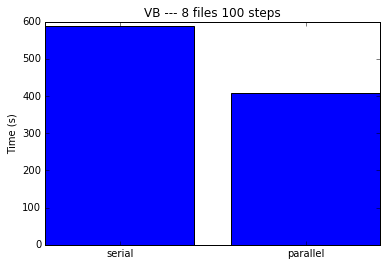

In [11]:
timing = [total_time_serial, total_time_parallel]
xs = np.arange(len(timing))
labels = ['serial', 'parallel']
plt.bar(xs, timing)
plt.ylabel('Time (s)')
plt.xticks(xs+0.4, labels)
plt.title('VB --- 8 files 100 steps')